## Q1. Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Q2.import csv file Diwali Sales Data.csv

In [3]:
dataset = pd.read_csv("Diwali Sales Data.csv", encoding='ISO-8859-1')


## Q3. Find the shape of the data

In [4]:
dataset.shape

(11251, 15)

## Q4. Fetch the first five rows of the dataset

In [5]:
dataset.head(20)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


## Q5. Get the complete info of the dataset

In [6]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Q6. Drop unrelated/blank columns 'Status' and 'unnamed1'

In [7]:
dataset.drop(['Status', 'unnamed1'], axis=1, inplace=True)


## Q7. Check for null values and find which columns have null values

In [8]:

null_counts = dataset.isnull().sum()
print(null_counts)
null_columns = null_counts[null_counts > 0]

print("Columns with null values:\n")
print(null_columns)


User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64
Columns with null values:

Amount    12
dtype: int64


## Q8. Calculate the mean value of Age, Orders and Amount by using describe function

In [9]:

summary_stats = dataset[['Age', 'Orders', 'Amount']].describe()

print("Mean values:\n")
print(summary_stats.loc['mean'])


Mean values:

Age         35.421207
Orders       2.489290
Amount    9453.610858
Name: mean, dtype: float64


## Q9. Plot a bar chart for Gender and it's count 

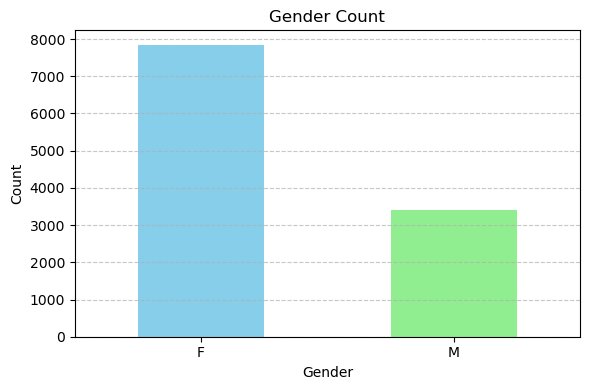

In [10]:

gender_counts = dataset['Gender'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])

plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Q10. Plot a bar chart for gender vs total amount 

Gender
F    74335856.43
M    31913276.00
Name: Amount, dtype: float64


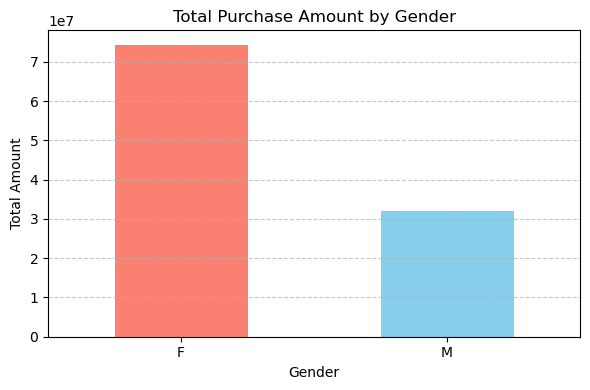

In [11]:

gender_amount = dataset.groupby('Gender')['Amount'].sum()
print(gender_amount)

plt.figure(figsize=(6,4))
gender_amount.plot(kind='bar', color=['salmon', 'skyblue'])

plt.title('Total Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Q11. Plot the countplot for Age Group with hue and Gender

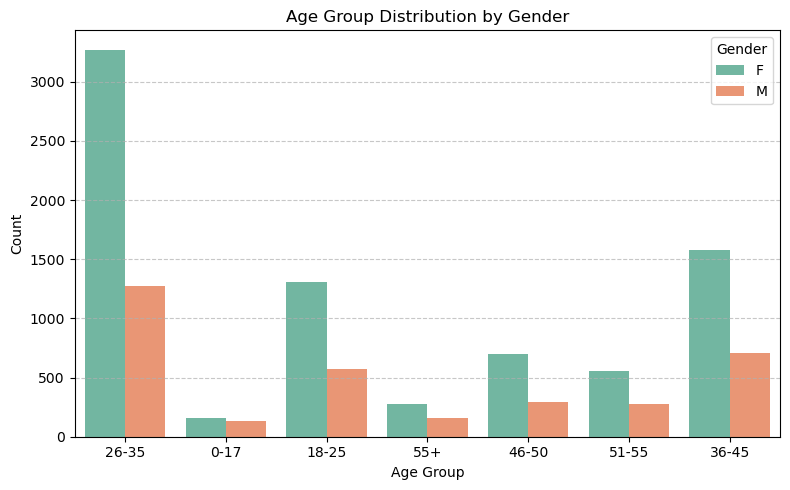

In [12]:

plt.figure(figsize=(8,5))
sns.countplot(data=dataset, x='Age Group', hue='Gender', palette='Set2')

plt.title('Age Group Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Q12. Draw the plot for total number of orders from top 10 states 

State
Andhra Pradesh      2054
Bihar               1062
Delhi               2744
Gujarat             1070
Haryana             1109
Himachal Pradesh    1568
Jharkhand            953
Karnataka           3241
Kerala              1137
Madhya Pradesh      2259
Maharashtra         3811
Punjab               495
Rajasthan            555
Telangana            312
Uttar Pradesh       4813
Uttarakhand          824
Name: Orders, dtype: int64


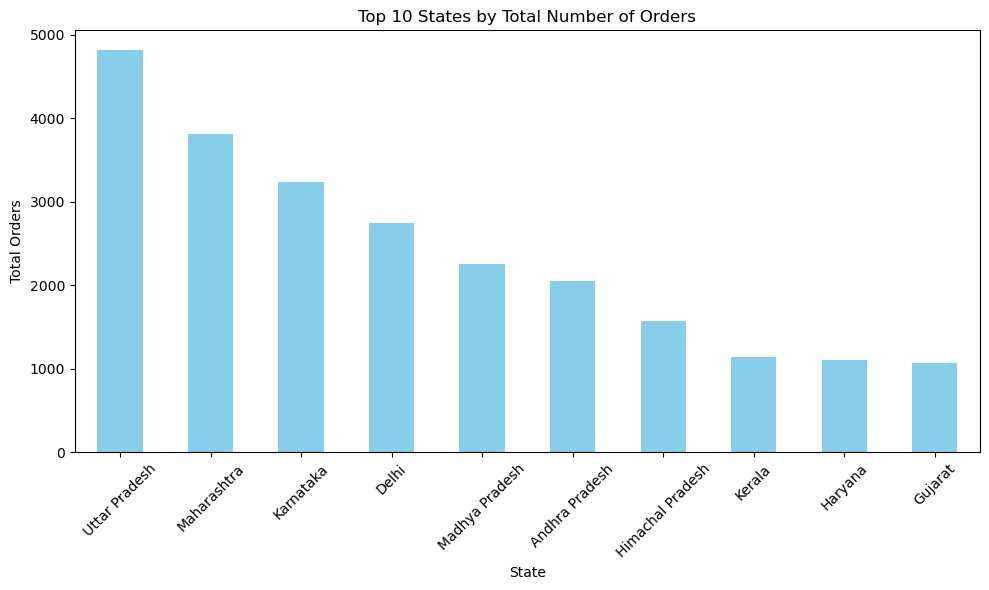

In [13]:

state_orders = dataset.groupby('State')['Orders'].sum()
print(state_orders)
top_10_states = state_orders.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_10_states.plot(kind='bar', color='skyblue')

plt.title('Top 10 States by Total Number of Orders')
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Q13.Draw the plot to plot total amount/sales from top 10 states

State
Andhra Pradesh       8037146.99
Bihar                4022757.00
Delhi               11603819.45
Gujarat              3946082.00
Haryana              4220175.00
Himachal Pradesh     4963368.00
Jharkhand            3026456.00
Karnataka           13523540.00
Kerala               3894491.99
Madhya Pradesh       8101142.00
Maharashtra         14427543.00
Punjab               1525800.00
Rajasthan            1909409.00
Telangana            1151490.00
Uttar Pradesh       19374968.00
Uttarakhand          2520944.00
Name: Amount, dtype: float64


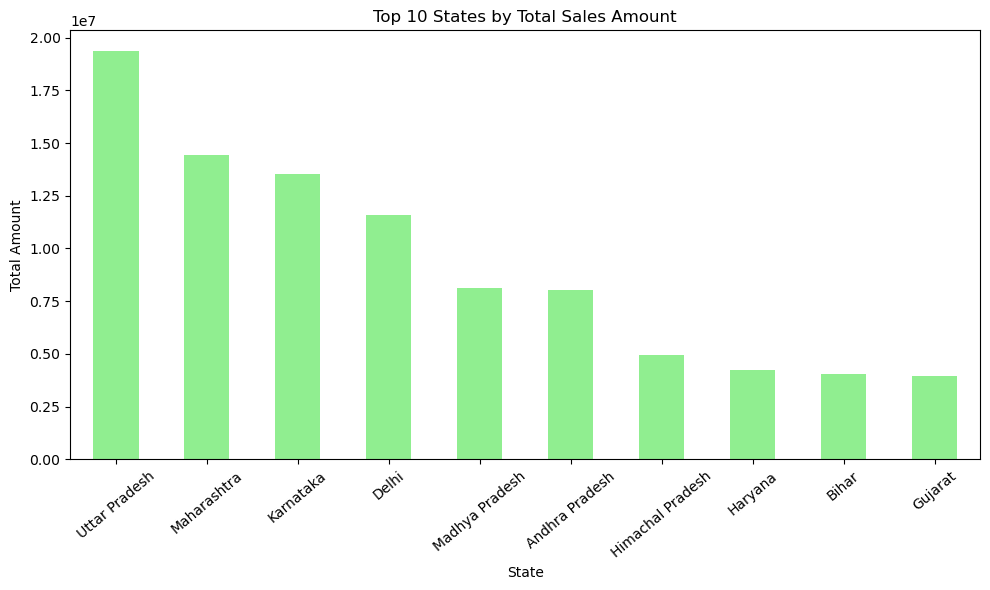

In [14]:
state_amount = dataset.groupby('State')['Amount'].sum()
print(state_amount)
top_10_states_amount = state_amount.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_10_states_amount.plot(kind='bar', color='lightgreen')

plt.title('Top 10 States by Total Sales Amount')
plt.xlabel('State')
plt.ylabel('Total Amount')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


## Q14. Draw the plot to show the marital status 

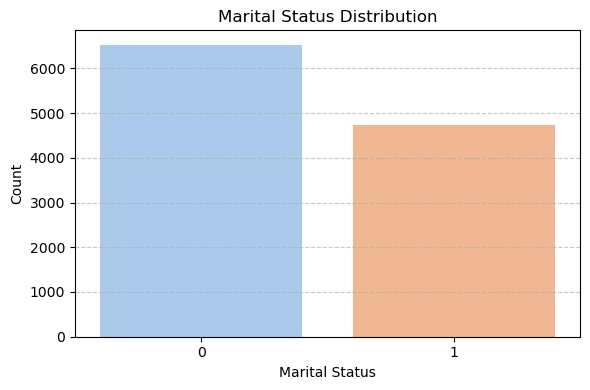

In [15]:

plt.figure(figsize=(6,4))
sns.countplot(data=dataset, x='Marital_Status', palette='pastel')

plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Q15. Draw the plot to show the top 10 occuoations

Occupation
IT Sector      1588
Healthcare     1408
Aviation       1310
Banking        1139
Govt            854
Hospitality     705
Media           637
Automobile      566
Chemical        542
Lawyer          531
Name: count, dtype: int64


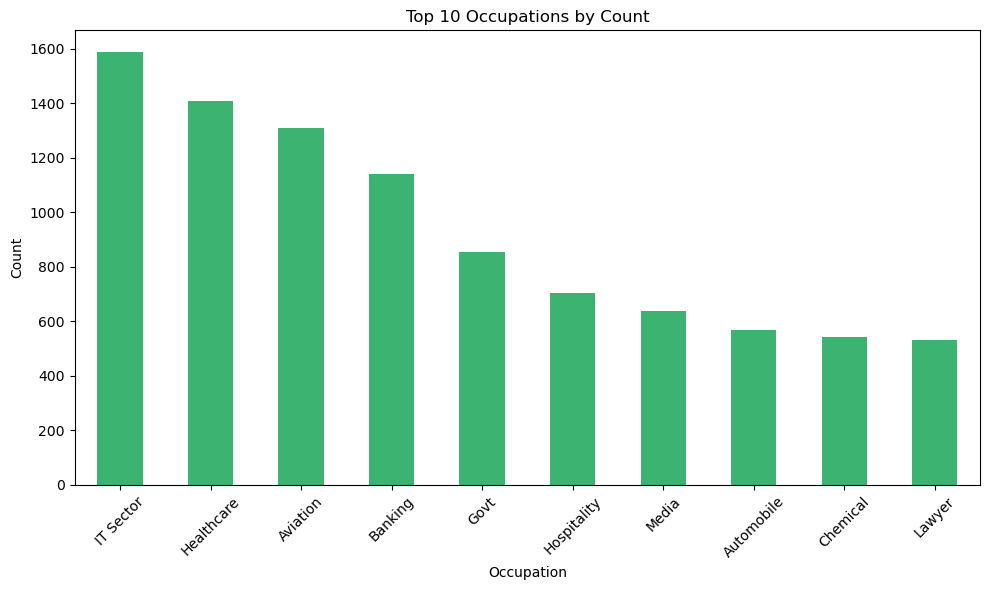

In [16]:

occupation_counts = dataset['Occupation'].value_counts().head(10)
print(occupation_counts)

plt.figure(figsize=(10,6))
occupation_counts.plot(kind='bar', color='mediumseagreen')

plt.title('Top 10 Occupations by Count')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Q16. Draw the countplot to print the top 10 categories 

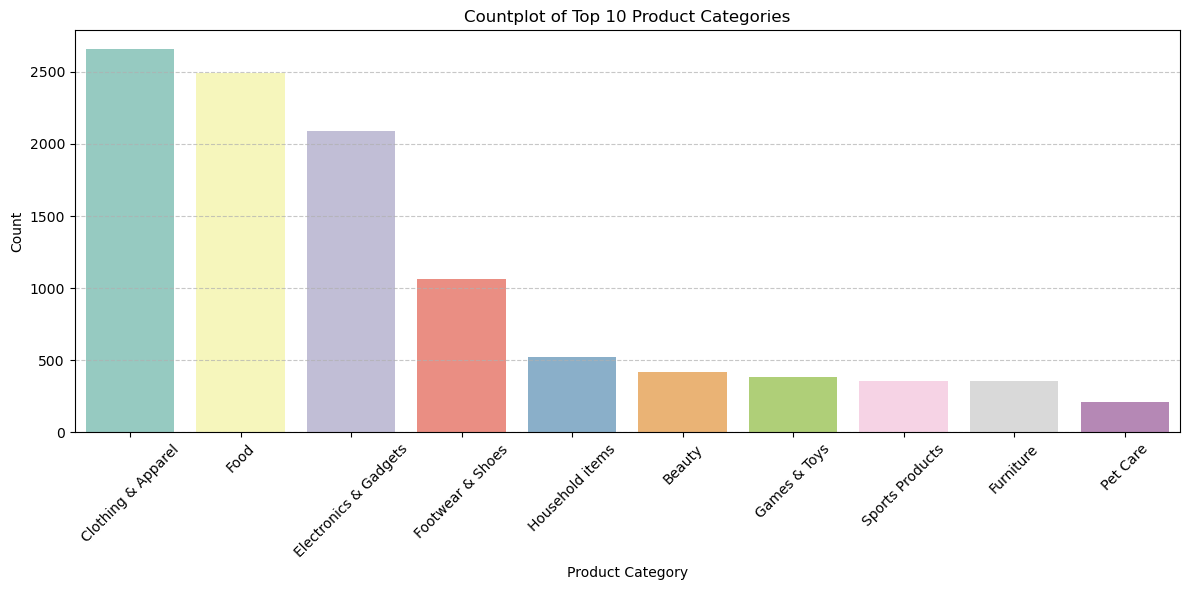

In [17]:

top_10_categories = dataset['Product_Category'].value_counts().nlargest(10).index
top_categories_data = dataset[dataset['Product_Category'].isin(top_10_categories)]
plt.figure(figsize=(12,6))
sns.countplot(data=top_categories_data, x='Product_Category', order=top_10_categories, palette='Set3')

plt.title('Countplot of Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Q17. What is the prodct ID of the top 10 most sold products.

In [18]:

product_orders = dataset.groupby('Product_ID')['Orders'].sum()

top_10_products = product_orders.sort_values(ascending=False).head(10)

print("Top 10 most sold products (Product_ID and total orders):")
print(top_10_products)


Top 10 most sold products (Product_ID and total orders):
Product_ID
P00265242    127
P00110942    116
P00237542     91
P00184942     82
P00114942     79
P00025442     79
P00145042     76
P00117942     76
P00044442     75
P00110842     74
Name: Orders, dtype: int64


## Q18. What conclusion you can draw from the above visualizations. 

In [19]:
top occupation sector is IT
TOP  prodcut_category is clothing and apparel
most sold product ID is P00265242  and product count  53
total amount/sales from top 10 states is Uttar Pradesh
age group 26-32
female buys more product than male

SyntaxError: invalid syntax (2492866124.py, line 1)

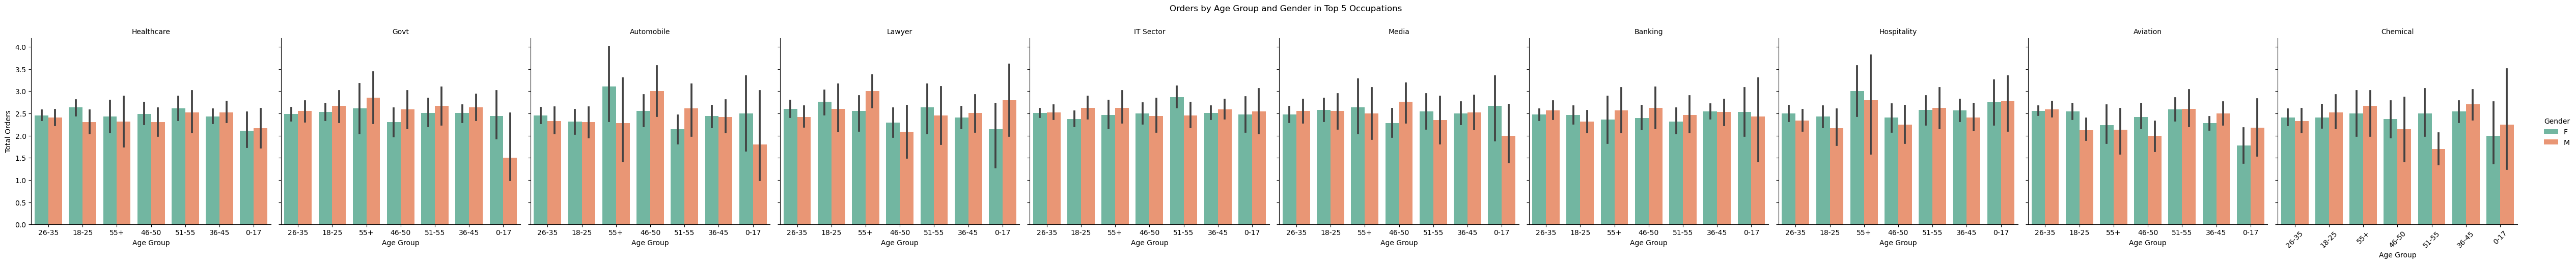

In [20]:

top_occupations = dataset['Occupation'].value_counts().head(10).index
filtered = dataset[dataset['Occupation'].isin(top_occupations)]

g = sns.catplot(
    data=filtered,
    x='Age Group',
    y='Orders',
    hue='Gender',
    col='Occupation',
    kind='bar',
    palette='Set2',
    height=5,
    aspect=1
)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Orders by Age Group and Gender in Top 5 Occupations')
g.set_axis_labels("Age Group", "Total Orders")
g.set_titles("{col_name}")
plt.xticks(rotation=45)
plt.show()
